### Wykrywanie obiektów w OpenCV - materiał bonusowy, ale przydatny

Niezwykle ważnym narzędziem w bibliotece OpenCV jest funkcja pozwalająca na wykrywanie obiektów na obrazach binarnych i reprezentowanie ich poprzez ich kontury: [`cv2.findContours`](https://docs.opencv.org/4.5.3/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0). Działa ona poprzez identyfikowanie zgrupowań niezerowych pikseli i zwraca ich kontur jako listę punktów - łamana poprowadzona między tymi punktami w całości zawiera wykryty obszar. Funkcja identyfikuje wszystkie grupy na obrazie, a co więcej, potrafi (opcjonalnie) rozpoznać hierarchię konturów (jeżeli jakiś obszar znajduje się wewnątrz innego).

Kontury są bardzo użyteczne w przetwarzaniu obrazów. Można za ich pomocą identyfikować rejony zainteresowania na obrazie, można wykonywać operacje na nich samych, a nawet wykorzystać je bezpośrednio do pozyskiwania _informacji_ o obiektach np. przez analizę kształtu konturu.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Rozpatrzmy poniższy obraz:

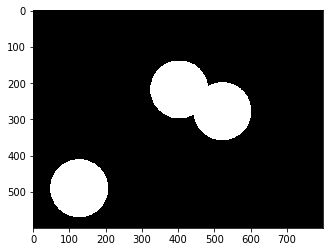

In [5]:
image = np.zeros((600, 800), dtype=np.uint8)
cv2.circle(image, (403, 218), 80, 255, -1)
cv2.circle(image, (522, 278), 80, 255, -1)
cv2.circle(image, (127, 490), 80, 255, -1)

plt.imshow(image, interpolation='none', cmap='gray');

Wykryjmy na nim kontury używając najprostszej metody `cv2.RETR_EXTERNAL`, która ignoruje hierarchię i zwraca tylko zewnętrzne kontury. Flaga `cv2.CHAIN_APPROX_SIMPLE` powoduje uproszczenie wyjściowych konturów poprzez aproksymację za pomocą odcinków (w przeciwnym razie `findContours` zwraca _wszystkie_ punkty brzegowe, których może być bardzo wiele).

In [18]:
contours, hierarchy = cv2.findContours(image, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
print(type(contours), len(contours))

<class 'list'> 2


Zauważamy, że funkcja zwraca listę wszystkich konturów (oraz listę hierarchii między nimi, którą w tej mini-instrukcji zignorujemy). Przyjrzyjmy się, co jest w środku:

In [9]:
for contour in contours:
    print(contour.shape)

(244, 1, 2)
(408, 1, 2)


Wyjściem są `ndarray` zawierające punkty brzegowe każdego konturu, w nieco dziwnej aranżacji: `Nx1x2`, gdzie N jest liczbą punktów, w wymiarze 1 nie ma nic, a dopiero w wymiarze 2 znajdują się współrzędne punktów.

Podglądanie zawartości liczbowej konturów nie ma większego sensu, ale dla podglądu możemy je wyświetlić za pomocą [`cv2.drawContours`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc):

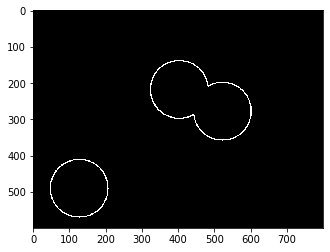

In [11]:
image_c = np.zeros_like(image)
cv2.drawContours(image_c, contours=contours, contourIdx=-1, color=255, thickness=2)

plt.imshow(image_c, interpolation='none', cmap='gray');

Ujemna grubość kreski pozwala na wypełnienie konturów. Poniżej przykład rysowania w kolorze:

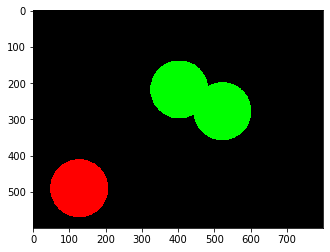

In [14]:
image_c3 = np.zeros((*image.shape, 3), dtype=np.uint8)
cv2.drawContours(image_c3, contours=contours, contourIdx=0, color=(255, 0, 0), thickness=-1)
cv2.drawContours(image_c3, contours=contours, contourIdx=1, color=(0, 255, 0), thickness=-1)

plt.imshow(image_c3, interpolation='none');

Kontury można oczywiście przetwarzać na najróżniejsze sposoby, ale jeśli temat Cię interesuje - zapoznaj się we własnym zakresie np. z funkcjami `cv2.contourArea`, `cv2.convexHull` czy `cv2.moments`.